# Project - Clean and Analyze Employee Exit Surveys with Pandas
In this  project, we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. We can find the TAFE exit survey [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) and the survey for the DETE [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey). We've made some slight modifications to these datasets to make them easier to work with, including changing the encoding to UTF-8 (the original ones are encoded using cp1252.)

As data analysts we want to know the following:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

Below is a preview of a couple columns we'll work with from the dete_survey.csv:

`ID`: An id used to identify the participant of the survey
`SeparationType`: The reason why the person's employment ended
`Cease Date`: The year or month the person's employment ended
`DETE Start Date`: The year the person began employment with the DETE

Below is a preview of a couple columns we'll work with from the tafe_survey.csv:

`Record ID`: An id used to identify the participant of the survey
`Reason for ceasing employment`: The reason why the person's employment ended
`LengthofServiceOverall`. Overall Length of Service at Institute (in years): The length of the person's employment (in years)

### Step-1: Datasets Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
dete_survey=pd.read_csv('dete_survey.csv')
tafe_survey=pd.read_csv('tafe_survey.csv')
pd.options.display.max_columns = 150 # to avoid truncated output 
print(dete_survey.shape)
print(tafe_survey.shape)

(822, 56)
(702, 72)


In [2]:
print(dete_survey.info())
print(dete_survey.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [3]:
print(tafe_survey.info())
print(tafe_survey.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

### Identifying Missing Values using [`Series.isnull(self)` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.isnull.html)
We use `isnull()` combined with `sum()` to give total no of NAN values for each column

In [4]:
missing_dete_survey=dete_survey.isnull().sum()

print(missing_dete_survey)


ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [5]:
missing_tafe_survey=tafe_survey.isnull().sum()
print(missing_tafe_survey)

Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
                                                                            ... 
CurrentAge. Current Age                                                      106
Employment Type. Employment Type                                             106
Classification. Classification                                               106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
LengthofServiceCurrent. Length of Service at current workplace (in years)    106
Length: 72, dtype: int64


### Identifying Missing Values and Drop Unnecessary Columns
- Dataframes contain 'Not Stated' values that indicate values are missing, but they aren't represented as NaN.
- Both the dete_survey and tafe_survey dataframes contain many columns that we don't need to complete our analysis.
- Each dataframe contains many of the same columns, but the column names are different.
- There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.

#### [Reread](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) `csv files` with  the `na_values` parameter set to ` str` to be read as NAN
We also use `df.drop()` [method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) to drop columns not relevant to our inquiry.
We have evaluated that following columns are not very relevant to our inquiry, hence we will drop them using `df.drop()` [method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)
- from dete_survey: dete_survey.columns[28:49]. 
- from tafe_survey: tafe_survey.columns[17:66]. 

In [6]:
# Read in the data again, read `Not Stated` values as `NaN`
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')
print(dete_survey.info()) # Note changes below in non-null values in columns 2,3,4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

In [7]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)
print(dete_survey_updated.info())
print(tafe_survey_updated.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

### Clean Column Names
We have to perform following steps to clean column name in both dataframes:
- Standardize name format through use of `str` operation
- Identify columns with similar data but different names and make them identical

We will:
Rename the remaining columns in the dete_survey_updated dataframe as under:
- Make all the capitalization lowercase.
- Remove any trailing whitespace from the end of the strings.
- Replace spaces with underscores ('_').
Use the `DataFrame.rename()` [method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html) to update the columns below in `tafe_survey_updated`: 
- 'Record ID': 'id'
- 'CESSATION YEAR': 'cease_date'
- 'Reason for ceasing employment': 'separationtype'
- 'Gender. What is your Gender?': 'gender'
- CurrentAge. Current Age': 'age'
- 'Employment Type. Employment Type': 'employment_status'
- 'Classification. Classification': 'position'
- 'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service'
- 'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'

In [8]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_')
print(dete_survey_updated.columns)


Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')


In [9]:
mapping = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separationtype', 'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age',
       'Employment Type. Employment Type': 'employment_status',
       'Classification. Classification': 'position',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe_survey_updated = tafe_survey_updated.rename(mapping, axis = 1)
print(tafe_survey_updated.columns)

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')


### Filtering Data
Since we are interested in discovering the reasons for early retirement, we will first focus on `separationtype` columnm, and  analyze survey respondents who resigned, so their separation type contains the string `'Resignation'. 

In [10]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [11]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [12]:
# update "Resignation+strings" separation type in dete_survey to read just "Resignation"
dete_survey_updated['separationtype']=dete_survey_updated['separationtype'].str.split('-').str[0]
dete_survey_updated['separationtype'].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

In [13]:
dete_resignations=dete_survey_updated[dete_survey_updated['separationtype']=='Resignation'].copy()
print(dete_resignations.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 3 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   311 non-null    int64  
 1   separationtype                       311 non-null    object 
 2   cease_date                           300 non-null    object 
 3   dete_start_date                      283 non-null    float64
 4   role_start_date                      271 non-null    float64
 5   position                             308 non-null    object 
 6   classification                       161 non-null    object 
 7   region                               265 non-null    object 
 8   business_unit                        32 non-null     object 
 9   employment_status                    307 non-null    object 
 10  career_move_to_public_sector         311 non-null    bool   
 11  career_move_to_private_sector   

In [14]:
tafe_resignations=tafe_survey_updated[dete_survey_updated['separationtype']=='Resignation'].copy()
print(tafe_resignations.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 3 to 701
Data columns (total 23 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   268 non-null    float64
 1   Institute                                            268 non-null    object 
 2   WorkArea                                             268 non-null    object 
 3   cease_date                                           265 non-null    float64
 4   separationtype                                       267 non-null    object 
 5   Contributing Factors. Career Move - Public Sector    171 non-null    object 
 6   Contributing Factors. Career Move - Private Sector   171 non-null    object 
 7   Contributing Factors. Career Move - Self-employment  171 non-null    object 
 8   Contributing Factors. Ill Health                     171 non-null    o

C:\Users\pc\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Above we have created truncated dataframes `dete_resignations` and `tafe_resignations` suitable for our purpose and comparatively easy to manage. `dete_resignations` has only 311 entries as compared to original 822 and `tafe_resignations` has 268 entries as compared to original 702.

### Verification of Data
Now we will check the columns containing `date` data for logical inconsistencies. We will be working with 
- clean the `cease_date column` in` dete_resignations`.
-  check the values in the `cease_date` and `dete_start_date` columns in `dete_resignations` and the `cease_date column` in `tafe_resignations`.
- plot the values of any numeric columns with a [histogram](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.hist.html)  to identify distribution.

In [15]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2012      1
07/2006      1
09/2010      1
2010         1
Name: cease_date, dtype: int64

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64


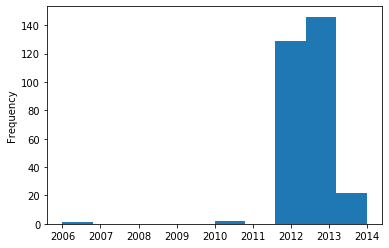

In [16]:
dete_resignations['cease_date']=dete_resignations['cease_date'].str.split('/').str[-1]
dete_resignations['cease_date'].value_counts()
dete_resignations['cease_date']=dete_resignations['cease_date'].astype('float')
print(dete_resignations['cease_date'].value_counts().sort_index()) # check again for outlying entries
dete_resignations['cease_date'].plot.hist()

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64


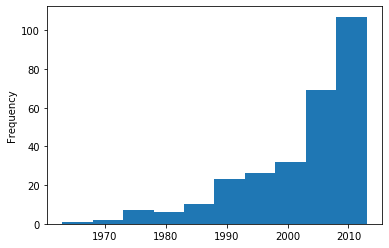

In [17]:
dete_values= dete_resignations['dete_start_date'].value_counts().sort_index()
print(dete_values)
dete_resignations['dete_start_date'].plot.hist()

In [18]:
tafe_resignations['cease_date'].value_counts().sort_index()

2009.0     2
2010.0    37
2011.0    92
2012.0    93
2013.0    41
Name: cease_date, dtype: int64

There are no apparent logical inconsistencies in the date columns. It is difficult to comment on duration of service in case of tafe since dates for start of employment are not given, however these can be interpreted from `institute_service` column. Bulk of resignations for tafe came between 2010-2013, while in case of dete 2012 and 2013 saw maximum resignations (275 out of 311 considered). When compared with start dates where as t
he bulk of start dates for those resigning was skewed towards 2000 or later (see histogram) **indicating a mean service in the range of 10-12 years for resigned employees.** We will confirm this inference in the next step.
Next we will be focusing on duration of service for both dete and taft to analyze the trends.

### Analyzing Duration of Service for 'Resigned' Employees 
- We will first create an `institute_service` column for `dete_resignations` dataframe. 
- For tafe_resignations `institute_service` column already exists.
- Calculate mean service for resigned employees.

mean_dete_service : 10.457875457875458
5.0     23
1.0     22
3.0     20
0.0     20
6.0     17
4.0     16
9.0     14
2.0     14
7.0     13
13.0     8
8.0      8
20.0     7
15.0     7
10.0     6
22.0     6
14.0     6
17.0     6
12.0     6
16.0     5
18.0     5
23.0     4
11.0     4
24.0     4
39.0     3
19.0     3
21.0     3
32.0     3
28.0     2
26.0     2
25.0     2
30.0     2
36.0     2
29.0     1
33.0     1
42.0     1
27.0     1
41.0     1
35.0     1
38.0     1
34.0     1
49.0     1
31.0     1
Name: institute_service, dtype: int64


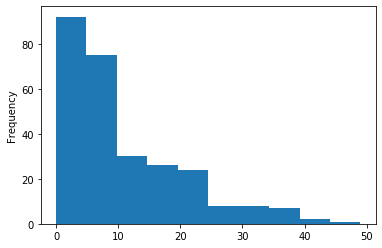

In [19]:
dete_resignations['institute_service']=dete_resignations['cease_date']-dete_resignations['dete_start_date']
mean_dete_service=dete_resignations['institute_service'].mean()
print('mean_dete_service',':',mean_dete_service)
print(dete_resignations['institute_service'].value_counts())
dete_resignations['institute_service'].plot.hist()


***As it can be seen, that our prediction from visualization of dete date datas was correct(10-12 years of mean service for resigned employees).


In [20]:
print(tafe_resignations['institute_service'].head())
print(tafe_resignations['institute_service'].value_counts(dropna=False)) 

3       NaN
5      7-10
8       3-4
9       1-2
11    11-20
Name: institute_service, dtype: object
Less than 1 year      49
NaN                   47
3-4                   41
11-20                 33
More than 20 years    30
1-2                   30
7-10                  20
5-6                   18
Name: institute_service, dtype: int64



***For tafe data above, we do not need to convert the values for analysis as it is quite clear that there are only 63 employees out of 268 who had service duration greater than 10 years. 205 employees who resigned served for less than 10 years with approx 150 having service less than 5 years.  

### Identification of 'Resigned' Employees Dissatisfaction
We will consider following columns for identification of employee dissatisfaction. We will use following columns in respective dataframes:

`tafe_resignations`:
  `Contributing Factors. Dissatisfaction`
  `Contributing Factors. Job Dissatisfaction`
`dete_resignations`:
  `job_dissatisfaction`
  `dissatisfaction_with_the_department`
  `physical_work_environment`
  `lack_of_recognition`
  `lack_of_job_security`
  `work_location`
  `employment_conditions`
  `work_life_balance`
  `workload`
- All above factors are equal weightage, dissatisfaction in one will mark an employee as dissatisfied.
- We will use `DataFrame.any()` [method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.any.html) to perform above bolean operation.
- `True`, `False` and `NAN` values will be assigned to a new column `dissatisfied` in both dataframes.

In [21]:
tafe_cfd=tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)
tafe_cfjd=tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)
print('Dissatisfaction',':',tafe_cfd)
print('Job Dissatisfaction',':',tafe_cfjd)

Dissatisfaction : -                                         146
NaN                                        97
Contributing Factors. Dissatisfaction      25
Name: Contributing Factors. Dissatisfaction, dtype: int64
Job Dissatisfaction : -                      141
NaN                     97
Job Dissatisfaction     30
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [22]:
def update_vals(val):
    if val == '-':
        return False
    elif pd.isnull(val):
        return np.nan
    else:
        return True
tafe_resignations['dissatisfied']= tafe_resignations[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(axis=1,skipna=False)   
tafe_resignations_up=tafe_resignations.copy()
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    128
True      97
True      43
Name: dissatisfied, dtype: int64

In [23]:
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(1, skipna=False) #update_vals function not required as values already in required format
dete_resignations_up = dete_resignations.copy()
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

### Combining Data 
we will combine our datasets with a view to aggregate the data according to the `institute_service `column.

In [ ]:
dete_resignations_up['institute'] = 'DETE' # for distinction when later combined
tafe_resignations_up['institute'] = 'TAFE'

In [24]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up],axis=0, ignore_index=True)
combined.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 52 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   579 non-null    float64
 1   separationtype                                       578 non-null    object 
 2   cease_date                                           565 non-null    float64
 3   dete_start_date                                      283 non-null    float64
 4   role_start_date                                      271 non-null    float64
 5   position                                             529 non-null    object 
 6   classification                                       161 non-null    object 
 7   region                                               265 non-null    object 
 8   business_unit                                        32 non-null     o

In [27]:
combined.notnull().sum().sort_values() # to reconfirm above results

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
Contributing Factors. Maternity/Family                 171
Contributing Factors. Career Move - Public Sector      171
Contributing Factors. Career Move - Private Sector     171
Contributing Factors. Career Move - Self-employment    171
Contributing Factors. Ill Health                       171
Contributing Factors. NONE                             171
Contributing Factors. Dissatisfaction                  171
Contributing Factors. Job Dissatisfaction              171
Contributing Factors. Interpersonal Conflict           171
Contributing Factors. Study                            1

In [28]:
combined_updated = combined.dropna(thresh = 480, axis =1).copy() # thresh=480 to retain both columns 'institute_service' and 'dissatisfied'
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 579 non-null    float64
 1   separationtype     578 non-null    object 
 2   cease_date         565 non-null    float64
 3   position           529 non-null    object 
 4   employment_status  528 non-null    object 
 5   gender             523 non-null    object 
 6   age                527 non-null    object 
 7   institute_service  494 non-null    object 
 8   dissatisfied       482 non-null    object 
dtypes: float64(2), object(7)
memory usage: 40.8+ KB


Since we intend to base our analysis on 'institute_service'(494) and 'dissatisfied'(482) columns, we have set thresh=480 to retain both columns. 

### Cleaning the `institute_service` Column
- We will categorize the column in accordance with stages of service as given [here](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage), as under:
- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company
First, we'll extract the years of service from each value in the institute_service column and then map each value to one of the career stage definitions above.

***Note: [Regular Expression (RE)](https://docs.python.org/3/library/re.html#module-re) uses `\d` For Unicode (str) patterns: Matches any Unicode decimal digit followed by `+` which causes the resulting RE to match 1 or more repetitions of the preceding RE i.e. `r'(\d+)'` will match any decimal digit in a string for infinite number of repetitions.  


In [29]:
combined_updated['institute_service'].value_counts(dropna=False)

NaN                   85
Less than 1 year      49
3-4                   41
11-20                 33
1-2                   30
More than 20 years    30
5.0                   23
1.0                   22
3.0                   20
7-10                  20
0.0                   20
5-6                   18
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
8.0                    8
13.0                   8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
23.0                   4
11.0                   4
24.0                   4
19.0                   3
39.0                   3
32.0                   3
21.0                   3
36.0                   2
30.0                   2
28.0                   2
26.0                   2
25.0                   2


In [31]:
# RE `r'(\d+)'` will match any decimal digit in a string for infinite number of repetitions.
# extract() instead of extractall() will extract first match of pattern, hence '3' in '3-4' and '11' in '11-20'
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)') 
#str chars converted to float
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')
combined_updated['institute_service_up'].value_counts().sort_index() # confirming years extracted

0.0      20
1.0     101
2.0      14
3.0      61
4.0      16
5.0      41
6.0      17
7.0      33
8.0       8
9.0      14
10.0      6
11.0     37
12.0      6
13.0      8
14.0      6
15.0      7
16.0      5
17.0      6
18.0      5
19.0      3
20.0     37
21.0      3
22.0      6
23.0      4
24.0      4
25.0      2
26.0      2
27.0      1
28.0      2
29.0      1
30.0      2
31.0      1
32.0      3
33.0      1
34.0      1
35.0      1
36.0      2
38.0      1
39.0      3
41.0      1
42.0      1
49.0      1
Name: institute_service_up, dtype: int64

In [32]:
combined_updated['institute_service_up'].count()

494

In [37]:
def car_stage(val):
    if val >= 11: 
        return "Veteran"
    elif 7 <= val < 11:
        return "Established"
    elif 3 <= val < 7:
        return "Experienced"
    elif pd.isnull(val):
        return np.nan
    else:
        return "New"
combined_updated['service_cat']=combined_updated['institute_service_up'].apply(car_stage) 
print(combined_updated['service_cat'].count())
combined_updated['service_cat'].value_counts(dropna=False)


494


Veteran        163
New            135
Experienced    135
NaN             85
Established     61
Name: service_cat, dtype: int64

### Preliminary Analysis
- In this preliminary analysis, we will determine the percentage of `dissatisfied` employees in each `service_cat` who `resigned` from service, and plot the results. 
- Above, we have already carried out initial analysis on separate dataframes according to which:
  - Mean service for resigned dete employees was 10.45 years (established and veterans cats).
  - Over 50% of resigned tafe employees served for less than 5 years (experienced and new cats).
- We can now do a combined analysis for each category separately   

In [39]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    290
True     192
True      97
Name: dissatisfied, dtype: int64

#### Dropping or Filling Values
There are 85 NAN values in `service_cat` column and 97 in `dissatisfied column`. We can either drop them or fill them with reasonable approximations. 
- We can fill `dissatisfied` column on the basis of value occuring most frequently i.e. `'False'` and `service_cat` column on the basis of mean institute_service. But corelation between the two is hard to establish at this stage.
- Therefore,we will only fill the `dissatisfied` column with `"False"` and let the missing values in `service_cat` column automatically drop if they are NAN

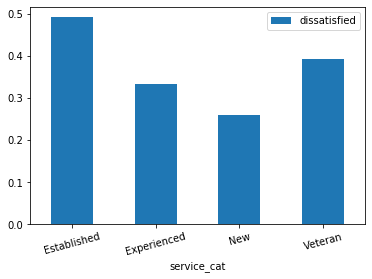

In [40]:
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)
dis_pct = combined_updated.pivot_table(index='service_cat', values='dissatisfied',aggfunc=np.mean)
dis_pct.plot(kind='bar', rot=15)

    

### Findings
- Our initial findings from dete dataframe that "Established" and "Veterans" were more likely to resign early are also manifested in combined analysis.
- Approx 50% of 'Established' and 40% of 'Veterans' were `dissatisfied`before they resigned.
- Between 25-30% of 'Experienced' and "New' employees were `dissatisfied` before they resigned.
- Further analysis may confirm that senior and entrenched employees leave early due to job dissatisfaction while newer employees may leave early due to some other factor such as 'better opportunities' elsewhere. 